<a href="https://colab.research.google.com/github/chiraglakra/ETG_Olympics_Analysis/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                  #to work on dataset
import matplotlib.pyplot as plt      #to plot graphs
import collections as co             #to get access to containers
import numpy as np

In [3]:
df = pd.read_csv("summer.csv")
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [5]:
df.isnull()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
31160,False,False,False,False,False,False,False,False,False
31161,False,False,False,False,False,False,False,False,False
31162,False,False,False,False,False,False,False,False,False
31163,False,False,False,False,False,False,False,False,False


**1.In how many cities Summer Olympics is held so far?**

In [8]:
print(len(df['City'].unique()))

print(df['City'].unique())

22
['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


In [9]:
data = []

for City in df['City'].unique():
    data.append([City , len(df[df['City']  == City])])

pd.DataFrame(data,columns = ['City','freq']).sort_values(by='freq', ascending=False)

,City,freq
3,London,3567
0,Athens,2149
7,Los Angeles,2074
21,Beijing,2042
20,Sydney,2015
19,Atlanta,1859
18,Barcelona,1705
17,Seoul,1546
1,Paris,1396
16,Moscow,1387


**2.Which sport is having most number of Gold Medals so far? (Top 5)**

In [11]:
data = []
for i in range(0,len(df)):
  if(df['Medal'][i]=='Gold'):
    data.append(df['Sport'][i])    #corresponding sport with gold medal is added to the list

In [12]:
data

['Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Athletics',
 'Cycling',
 'Cycling',
 'Cycling',
 'Cycling',
 'Cycling',
 'Cycling',
 'Fencing',
 'Fencing',
 'Fencing',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Gymnastics',
 'Shooting',
 'Shooting',
 'Shooting',
 'Shooting',
 'Shooting',
 'Tennis',
 'Tennis',
 'Tennis',
 'Weightlifting',
 'Weightlifting',
 'Wrestling',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',
 'Aquatics',


In [13]:
x=co.Counter(data)
x.most_common(5) #top 5 sports with gold medals

[('Aquatics', 1421),
 ('Athletics', 1215),
 ('Rowing', 890),
 ('Gymnastics', 820),
 ('Fencing', 552)]

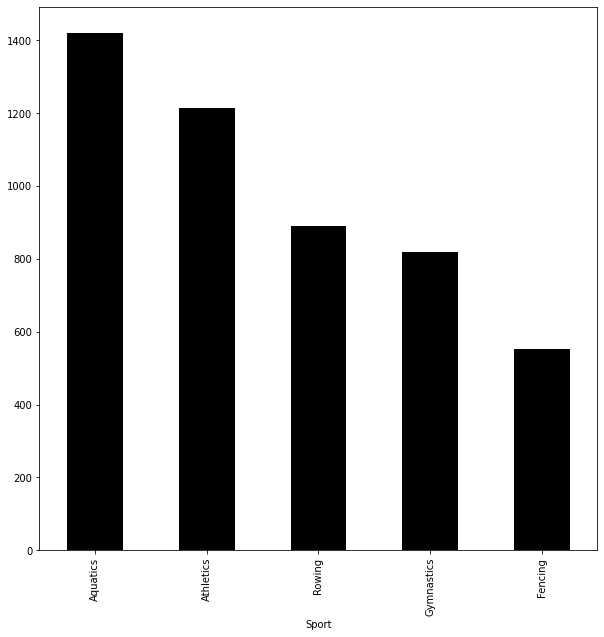

In [15]:
df_gold = df[df['Medal'] == 'Gold']

df_gold.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize = (10,10), color="black")

**3.Which sport is having most number of medals so far? (Top 5)**

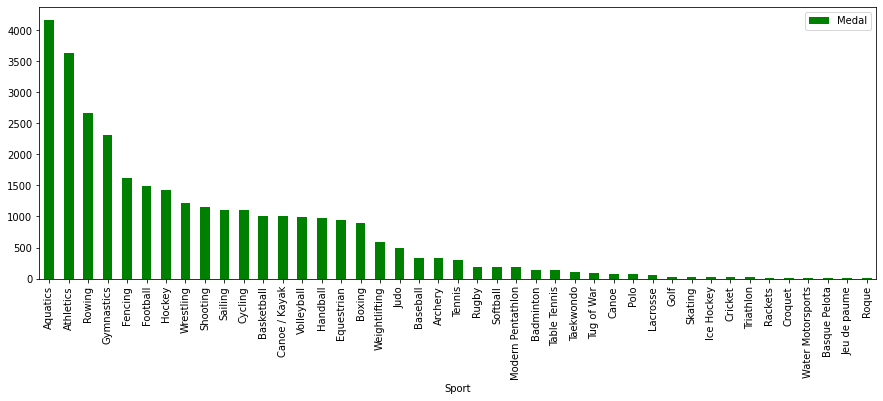

In [20]:
data = []

for s in df['Sport'].unique():
    data.append([s , len(df[df['Sport']  == s])])
    
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (15,5),color ='green')
#top 5 could be identified from graph

**4.Which player has won most number of medals? (Top 5)**

In [21]:
p=[]
for i in range(0,len(df)):
  p.append(df['Athlete'][i])
x=co.Counter(p)
x.most_common(5) #top 5 players with most medals

[('PHELPS, Michael', 22),
 ('LATYNINA, Larisa', 18),
 ('ANDRIANOV, Nikolay', 15),
 ('MANGIAROTTI, Edoardo', 13),
 ('ONO, Takashi', 13)]

**5.Which player has won most number Gold Medals of medals?(Top 5)**

In [22]:
data = []

for i in range(0,len(df)):
  if(df['Medal'][i]=='Gold'):
    data.append(df['Athlete'][i]) #corresponding value under Athlete column is added to the list

x=co.Counter(data)
x.most_common(5) 

[('PHELPS, Michael', 18),
 ('NURMI, Paavo', 9),
 ('LATYNINA, Larisa', 9),
 ('SPITZ, Mark', 9),
 ('LEWIS, Carl', 9)]

**6.In which year India won first Gold Medal in Summer Olympics?**

In [23]:
p=[]

for i in range(len(df)):
  if(df['Country'][i]=='IND' and df['Medal'][i]=='Gold'):
    p.append(df['Year'][i])   #all the years during which india won a gold medal is added to the list

print(p[0])                   #the year in which india won first gold medal is printed

1928


**7.Which event is most popular in terms of number of players?(Top 5)**

In [26]:
k=[]

for i in range(0,len(df)):
  k.append(df['Event'][i])

x=co.Counter(k)
x.most_common(5) 

[('Football', 1497),
 ('Hockey', 1422),
 ('Team Competition', 1147),
 ('Basketball', 1012),
 ('Handball', 973)]

**8.Which sport is having most female Gold Medalists?(Top 5)**

In [28]:
w=[]

for i in range(len(df)):
  if(df['Gender'][i]=='Women' and df['Medal'][i]=='Gold'):
    w.append(df['Sport'][i])

x=co.Counter(w)
x.most_common(5)

[('Aquatics', 589),
 ('Athletics', 389),
 ('Gymnastics', 268),
 ('Rowing', 217),
 ('Volleyball', 166)]

# **-----THE END-----**